In [ ]:
!pip install groq
!pip install pandas
!pip install numpy
!pip install evaluate
!pip install langchain-groq
!pip install python-dotenv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.2/122.2 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.9/415.9 kB 7.8 MB/s eta 0:00:00:00:01
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.25
    Uninstalling langchain-core-0.3.25:
      Successfully uninstalled langchain-core-0.3.25
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain 0.3.12 requires async-timeout<5.0.0,>=4.0.0; python_version < "3.11", but you have async-timeout 5.0.1 which is incompatible.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from langchain_groq import ChatGroq
from evaluate import load
from dotenv import load_dotenv
from langchain.schema import SystemMessage, HumanMessage

In [ ]:
results_df1 = pd.read_csv("/kaggle/input/vayubuddy/result_1.csv")
results_df2 = pd.read_csv("/kaggle/input/vayubuddy/result_2.csv")
results_df1.drop(columns=['Unnamed: 0'], inplace=True)
results_df2.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
results_df1

,id,question,answer,category,model,true_code,pass@1,pass@2,pass@5,result,status,sample
0,0,Which city has the highest average PM2.5 in De...,Begusarai,spatial_aggregation,gemma2-9b-it,def true_code():\n import pandas as pd\n ...,0.2,0.377778,0.777778,failed:,False,\nimport pandas as pd\nimport numpy as np\ndef...
1,0,Which city has the highest average PM2.5 in De...,Begusarai,spatial_aggregation,gemma2-9b-it,def true_code():\n import pandas as pd\n ...,0.2,0.377778,0.777778,failed:,False,\nimport pandas as pd\nimport numpy as np\ndef...
2,0,Which city has the highest average PM2.5 in De...,Begusarai,spatial_aggregation,gemma2-9b-it,def true_code():\n import pandas as pd\n ...,0.2,0.377778,0.777778,failed:,False,\nimport pandas as pd\n\ndef get_response(data...
3,0,Which city has the highest average PM2.5 in De...,Begusarai,spatial_aggregation,gemma2-9b-it,def true_code():\n import pandas as pd\n ...,0.2,0.377778,0.777778,passed,True,\nimport pandas as pd\nimport numpy as np\ndef...
4,0,Which city has the highest average PM2.5 in De...,Begusarai,spatial_aggregation,gemma2-9b-it,def true_code():\n import pandas as pd\n ...,0.2,0.377778,0.777778,failed:,False,\nimport pandas as pd\nimport numpy as np\ndef...
...,...,...,...,...,...,...,...,...,...,...,...,...
12795,5,What percentage of the population lives in are...,29.21960675284611,population_based,mixtral-8x7b-32768,def true_code():\n import numpy as np\n ...,0.0,0.000000,0.000000,failed: unexpected character after line contin...,False,\nimport pandas as pd\n\ndef get\_response(dat...
12796,5,What percentage of the population lives in are...,29.21960675284611,population_based,mixtral-8x7b-32768,def true_code():\n import numpy as np\n ...,0.0,0.000000,0.000000,failed:,False,\nimport pandas as pd\nimport numpy as np\n\nd...
12797,5,What percentage of the population lives in are...,29.21960675284611,population_based,mixtral-8x7b-32768,def true_code():\n import numpy as np\n ...,0.0,0.000000,0.000000,failed: unexpected character after line contin...,False,\nimport pandas as pd\n\ndef get\_response(dat...
12798,5,What percentage of the population lives in are...,29.21960675284611,population_based,mixtral-8x7b-32768,def true_code():\n import numpy as np\n ...,0.0,0.000000,0.000000,failed: name 'get_response' is not defined,False,NaN


In [ ]:
results_df2

,id,question,answer,category,model,true_code,pass@1,pass@2,pass@5,result,status,sample
0,0,Which city has the highest average PM2.5 in De...,Begusarai,spatial_aggregation,gemma2-9b-it,def true_code():\n import pandas as pd\n ...,0.1,0.2,0.5,failed:,False,\nimport pandas as pd\nimport numpy as np\ndef...
1,0,Which city has the highest average PM2.5 in De...,Begusarai,spatial_aggregation,gemma2-9b-it,def true_code():\n import pandas as pd\n ...,0.1,0.2,0.5,failed:,False,\nimport pandas as pd\nimport numpy as np\n\nd...
2,0,Which city has the highest average PM2.5 in De...,Begusarai,spatial_aggregation,gemma2-9b-it,def true_code():\n import pandas as pd\n ...,0.1,0.2,0.5,failed:,False,\nimport pandas as pd\nimport numpy as np\ndef...
3,0,Which city has the highest average PM2.5 in De...,Begusarai,spatial_aggregation,gemma2-9b-it,def true_code():\n import pandas as pd\n ...,0.1,0.2,0.5,failed:,False,\nimport pandas as pd\nimport numpy as np\ndef...
4,0,Which city has the highest average PM2.5 in De...,Begusarai,spatial_aggregation,gemma2-9b-it,def true_code():\n import pandas as pd\n ...,0.1,0.2,0.5,failed:,False,\nimport pandas as pd\nimport numpy as np\ndef...
...,...,...,...,...,...,...,...,...,...,...,...,...
13595,5,Report the fifth most polluted states in terms...,Nagaland,population_based,qwen-qwq-32b,def true_code():\n import pandas as pd\n ...,0.0,0.0,0.0,"failed: '[' was never closed (<string>, line 7)",False,\n\n\nimport pandas as pd\n\ndef get_response(...
13596,5,Report the fifth most polluted states in terms...,Nagaland,population_based,qwen-qwq-32b,def true_code():\n import pandas as pd\n ...,0.0,0.0,0.0,"failed: '[' was never closed (<string>, line 7)",False,\n\n\nimport pandas as pd\n\ndef get_response(...
13597,5,Report the fifth most polluted states in terms...,Nagaland,population_based,qwen-qwq-32b,def true_code():\n import pandas as pd\n ...,0.0,0.0,0.0,"failed: '[' was never closed (<string>, line 8)",False,\n\n\nimport pandas as pd\n\ndef get_response(...
13598,5,Report the fifth most polluted states in terms...,Nagaland,population_based,qwen-qwq-32b,def true_code():\n import pandas as pd\n ...,0.0,0.0,0.0,"failed: '[' was never closed (<string>, line 8)",False,\n\n\nimport pandas as pd\n\ndef get_response(...


In [ ]:
df1 = results_df1.drop(columns=["question", "answer", "true_code", "result", "status", "sample", "id"])
df2 = results_df2.drop(columns=["question", "answer", "true_code", "result", "status", "sample", "id"])

In [ ]:
df1 = df1.groupby(['model','category']).mean().reset_index()
df2 = df2.groupby(['model','category']).mean().reset_index()

In [ ]:
df = pd.merge(df1, df2, on=['model', 'category'], how='inner',suffixes=('_before', '_after'))
df

,model,category,pass@1_before,pass@2_before,pass@5_before,pass@1_after,pass@2_after,pass@5_after
0,deepseek-r1-distill-llama-70b,area_based,0.770000,0.915556,0.997222,0.680000,0.855556,0.986905
1,deepseek-r1-distill-llama-70b,funding_based,0.790000,0.948889,1.000000,0.840000,0.944444,0.997619
2,deepseek-r1-distill-llama-70b,multi_lingual,0.413333,0.567407,0.800529,0.640000,0.822222,0.957407
3,deepseek-r1-distill-llama-70b,population_based,0.900000,0.992593,1.000000,0.883333,0.974074,1.000000
4,deepseek-r1-distill-llama-70b,spatial_aggregation,0.700000,0.767677,0.873737,0.854545,0.925253,0.979798
...,...,...,...,...,...,...,...,...
123,qwen-2.5-coder-32b,population_based,0.783333,0.822222,0.833333,0.916667,0.992593,1.000000
124,qwen-2.5-coder-32b,spatial_aggregation,0.727273,0.777778,0.817460,0.818182,0.876768,0.952020
125,qwen-2.5-coder-32b,spatio_temporal_aggregation,0.510000,0.582222,0.600000,0.700000,0.853333,0.969444
126,qwen-2.5-coder-32b,specific_patterns,0.342857,0.441270,0.599206,0.457143,0.530159,0.630952


In [ ]:
pass_1_df = df.pivot(index='category', columns='model', values=['pass@1_before', 'pass@1_after'])
pass_1_df = pass_1_df.swaplevel(0, 1, axis=1)
pass_1_df = pass_1_df.sort_index(axis=1, level=[0, 1], ascending=[True, False])
pass_1_df.style.highlight_max(axis=1, props='background-color:lightblue;font-weight: bold;') \
       .highlight_max(axis=0, props='background-color:yellow;text-decoration: underline;')

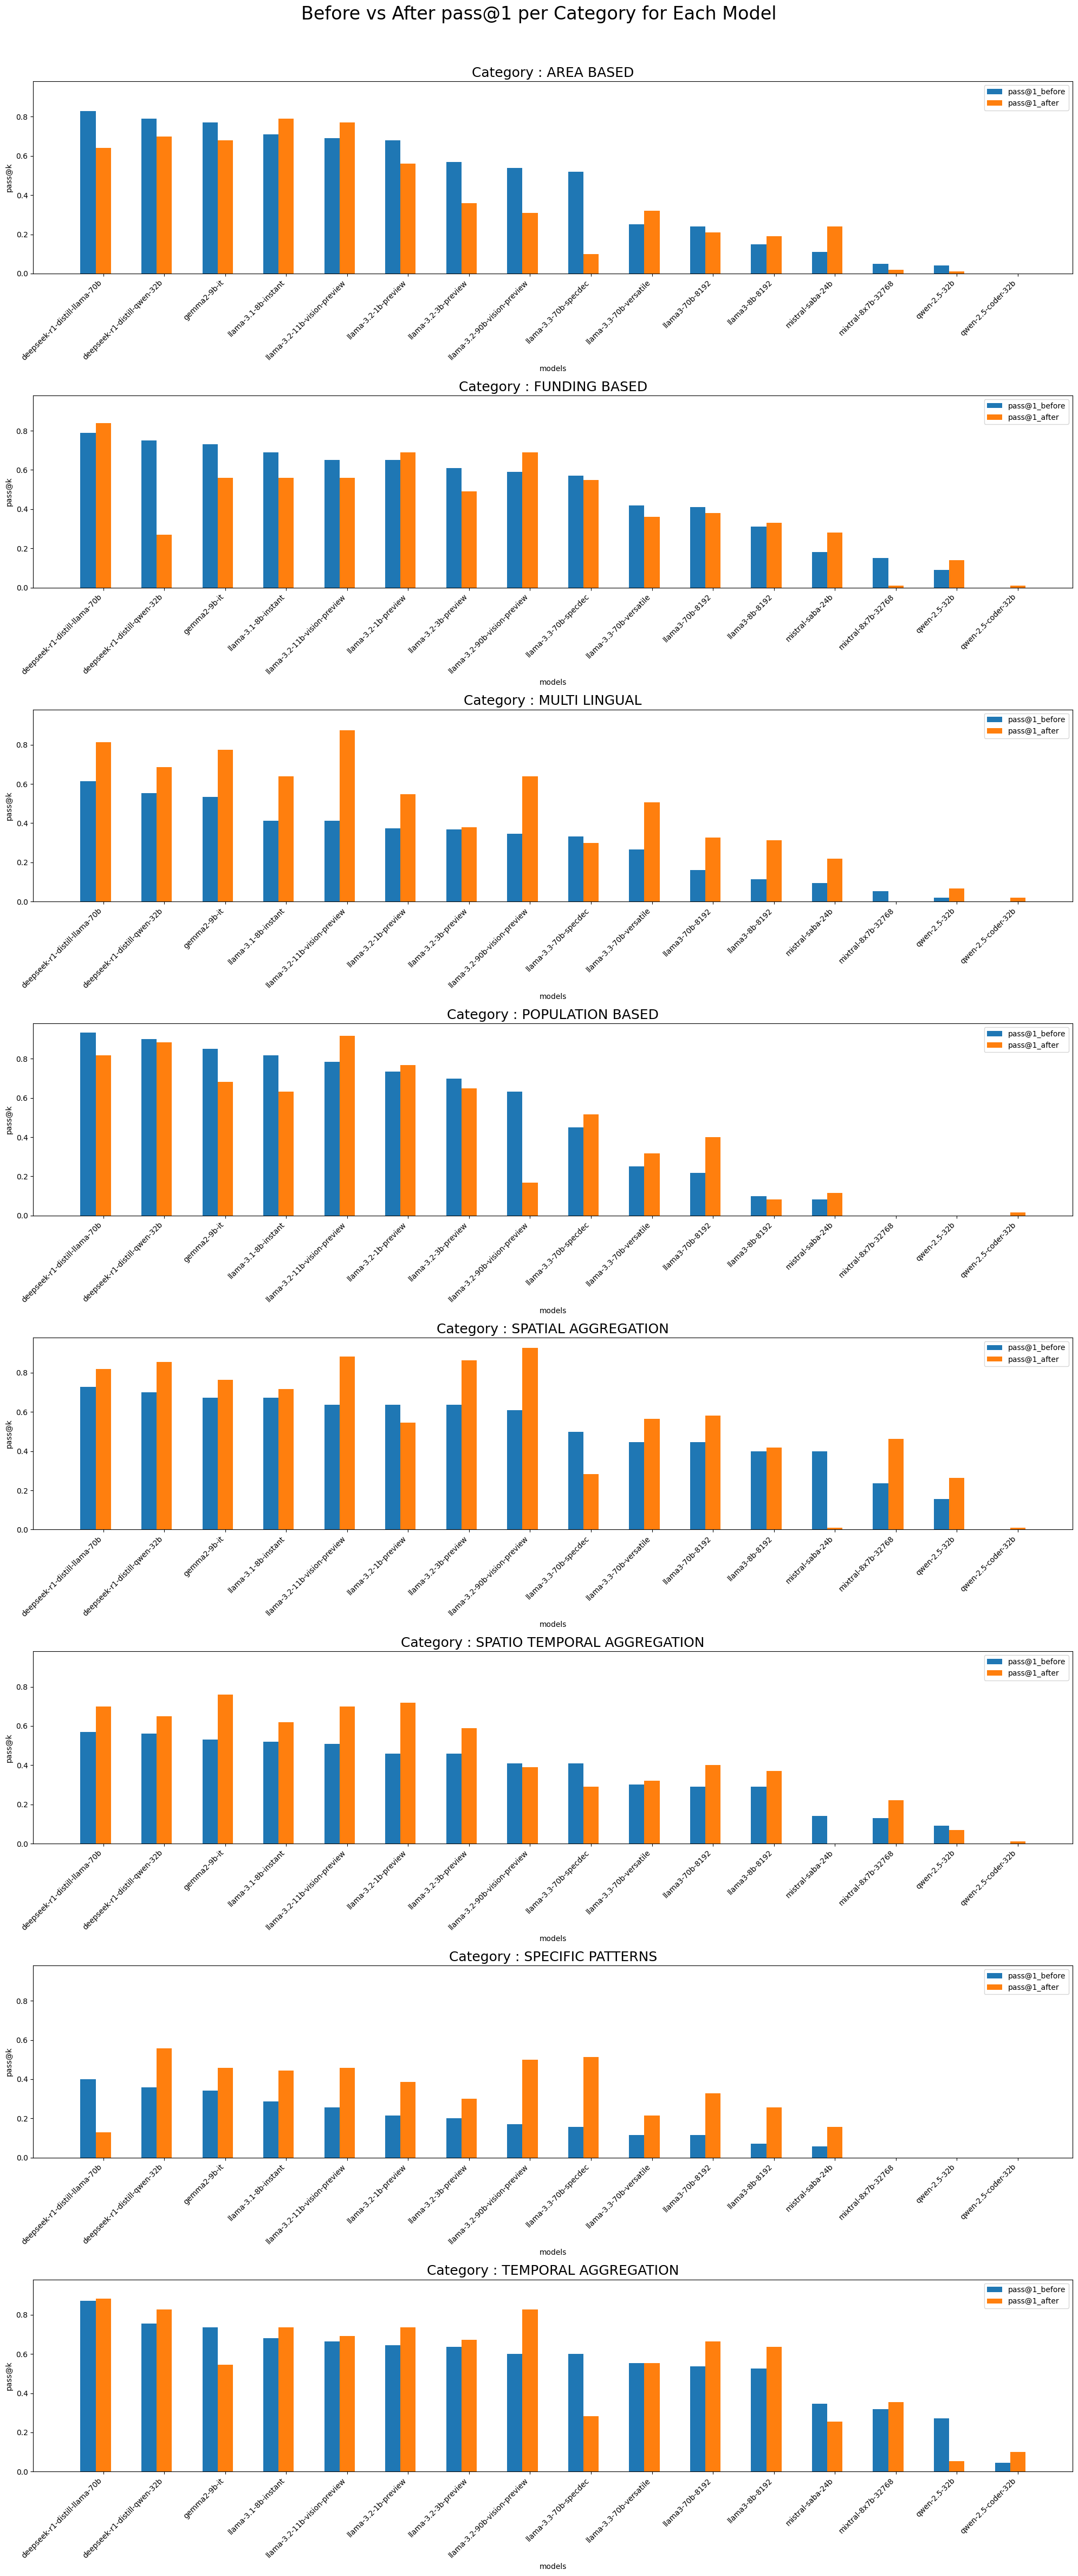

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

models = pass_1_df.columns.levels[0].tolist()
scores = ['pass@1_before', 'pass@1_after']
categories = pass_1_df.index.tolist()

num_models = len(models)

fig, axes = plt.subplots(8, 1, figsize=(20, 50), sharey=True)
axes = axes.flatten()

for idx, cls in enumerate(categories):
    ax = axes[idx]

    class_row = pass_1_df.loc[cls]
    # sorting based on pass@1_before values
    pass1_values = [class_row[(model, 'pass@1_before')] for model in models]
    sort_order = np.argsort(pass1_values)[::-1]  # reverse for descending order
    sorted_models = [models[i] for i in sort_order]

    data = []
    for model in sorted_models:
        scores_values = [
            class_row[(model, score)] for score in scores
        ]
        data.append(scores_values)

    data = np.array(data)

    x = np.arange(len(sorted_models))

    width = 0.25

    for i, score in enumerate(scores):
        ax.bar(
            x + (i - 1) * width,
            data[:, i],
            width=width,
            label=score
        )

    ax.set_title(f'Category : {cls.replace("_", " ").upper()}', fontsize=18)
    ax.set_xlabel('models')
    ax.set_ylabel('pass@k')

    ax.set_xticks(x)
    ax.set_xticklabels(models, rotation=45, ha='right')

    ax.legend()
plt.suptitle('Before vs After pass@1 per Category for Each Model', fontsize=24)

plt.tight_layout(rect=[0, 0.03, 1, 0.97])

plt.show()

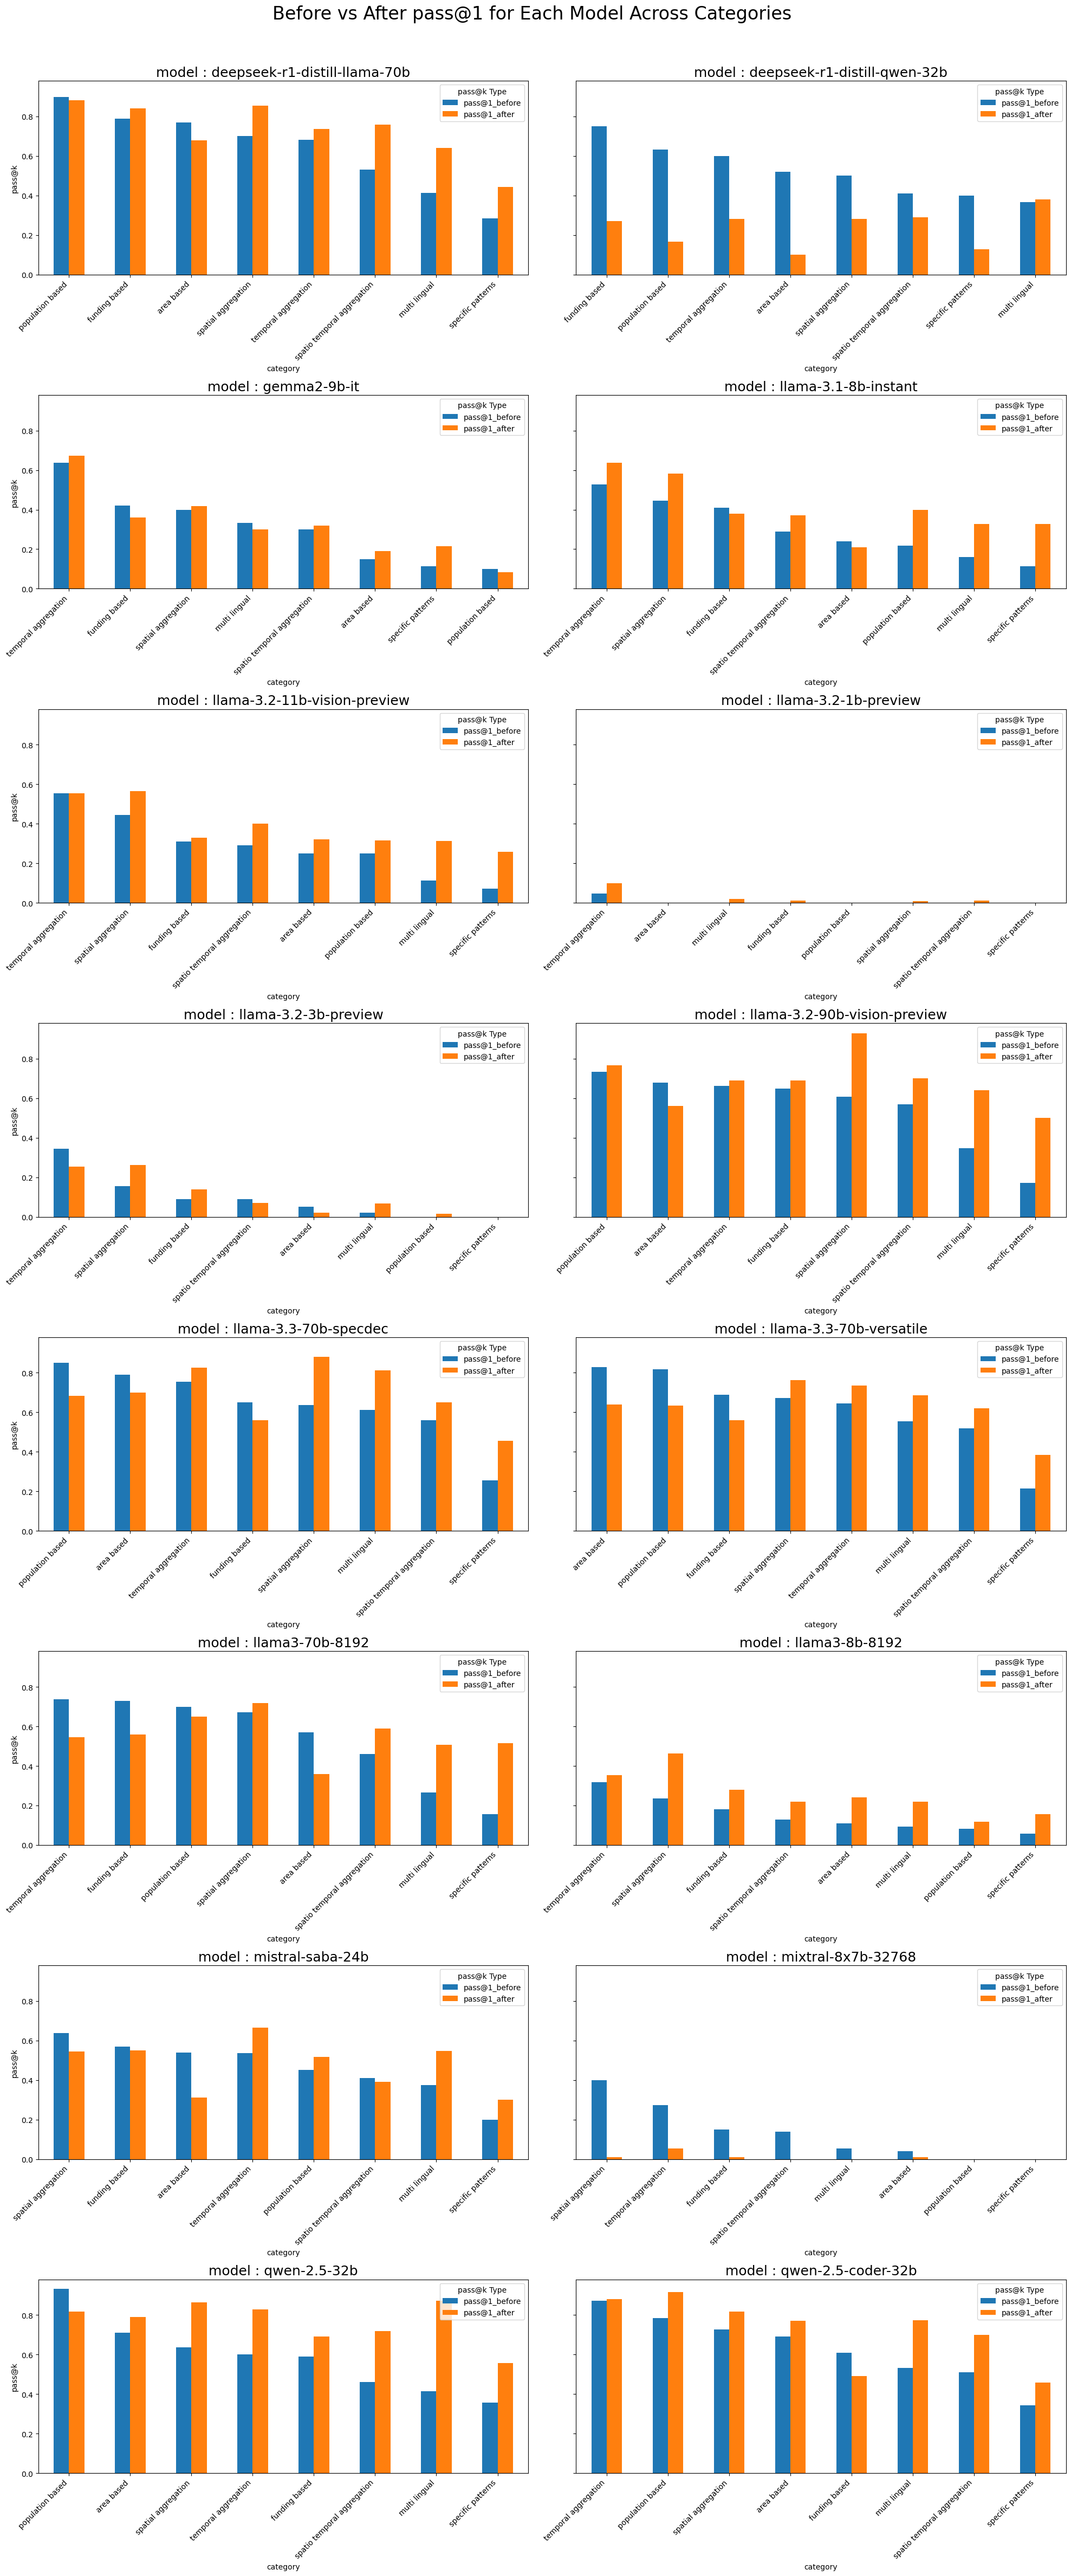

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

models = pass_1_df.columns.levels[0]
num_models = len(models)

fig, axes = plt.subplots(8, 2, figsize=(20, 50), sharey=True)
axes = axes.flatten()

for idx, model in enumerate(models):
    ax = axes[idx]

    # Sorting rows for the current model by 'pass@1_before' in descending order
    model_scores = pass_1_df[model].sort_values(by='pass@1_before', ascending=False)

    model_scores.plot(kind='bar', ax=ax)

    ax.set_title(f'model : {model}', fontsize=18)
    ax.set_xlabel('category')
    ax.set_ylabel('pass@k')

    ax.set_xticklabels([x.get_text().replace('_', ' ') for x in ax.get_xticklabels()], rotation=45, ha='right')
    ax.legend(title="pass@k Type")

plt.suptitle('Before vs After pass@1 for Each Model Across Categories', fontsize=24)
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

In [ ]:
pass_1_df = df.drop(columns=['pass@2_before', 'pass@5_before', 'pass@5_after', 'pass@2_after', 'category'])
pass_1_df = pass_1_df.groupby(['model']).mean().reset_index()
pass_1_df

,model,pass@1_before,pass@1_after
0,deepseek-r1-distill-llama-70b,0.633858,0.729637
1,deepseek-r1-distill-qwen-32b,0.522500,0.237359
2,gemma2-9b-it,0.306748,0.319816
3,llama-3.1-8b-instant,0.300460,0.404177
4,llama-3.2-11b-vision-preview,0.285595,0.381916
5,llama-3.2-1b-preview,0.005682,0.018636
6,llama-3.2-3b-preview,0.093750,0.103939
7,llama-3.2-90b-vision-preview,0.553019,0.684356
8,llama-3.3-70b-specdec,0.638923,0.696613
9,llama-3.3-70b-versatile,0.617808,0.628214


In [ ]:
pass_1_df.columns[1:3].tolist()

['pass@1_before', 'pass@1_after']

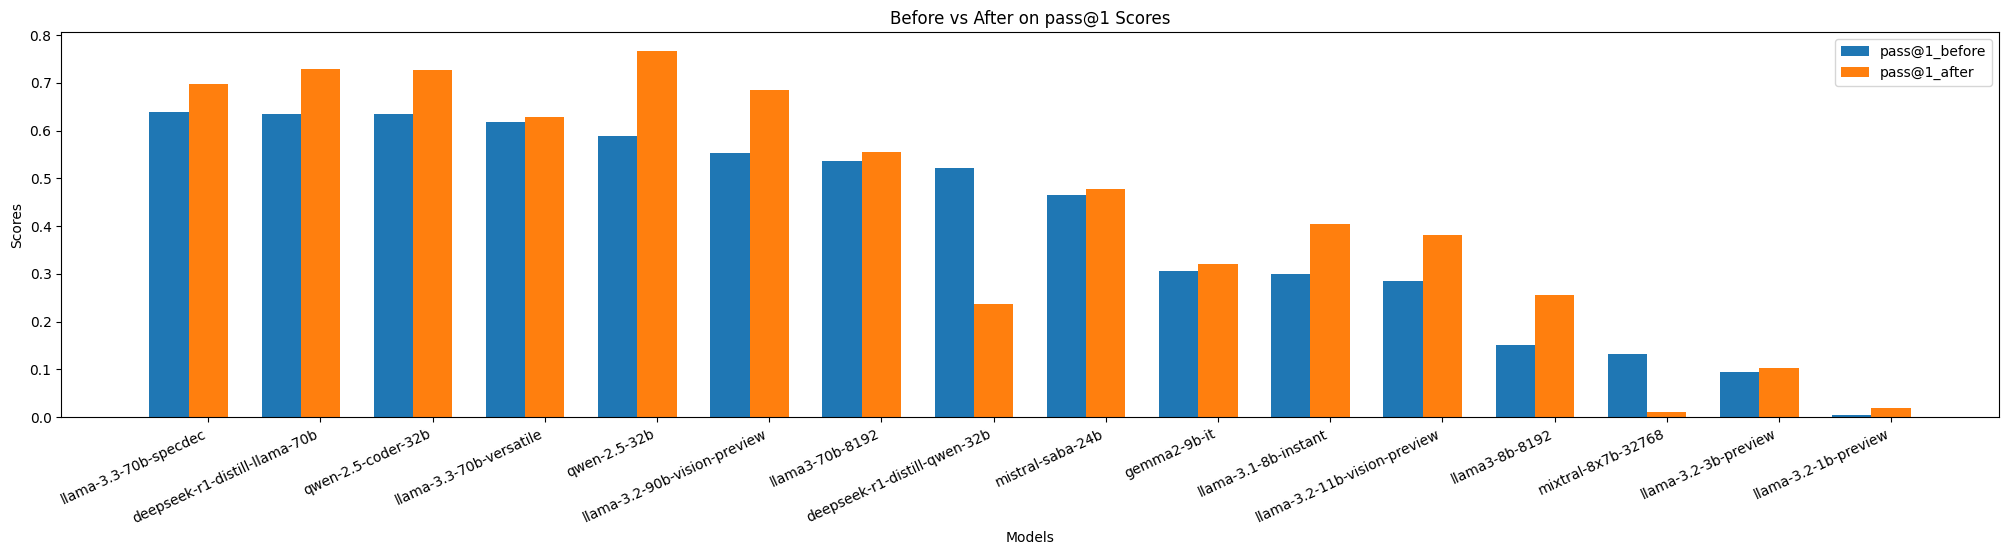

In [ ]:
sorted_df = pass_1_df.sort_values(by='pass@1_before', ascending=False)

models = sorted_df['model'].tolist()
pass_at_k = sorted_df.columns[1:3].tolist()

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(25, 5))

for i, score in enumerate(pass_at_k):
    ax.bar(x + i * width, sorted_df[score], width, label=score)

ax.set_xticks(x + width)
ax.set_xticklabels(models, rotation=25, ha='right')
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Before vs After on pass@1 Scores')
ax.legend()
plt.show()

# My category analysis

In [ ]:
analysis = df_1.pivot(index=["category"], columns=["model"], values=["pass@1"])
analysis.style \
       .highlight_max(axis=1, props='background-color:lightblue;font-weight: bold;') \
       .highlight_max(axis=0, props='background-color:yellow;text-decoration: underline;')

In [ ]:
result_cat = results_df_1[results_df_1["category"].isin(["funding_based","area_based","population_based"])].reset_index().drop(columns=['index'])
result_cat['result_category'] = result_cat['result'].apply(lambda x: 'fail' if x == 'failed: ' else 'pass' if x == 'passed' else 'error')
result_cat

,id,question,answer,category,model,true_code,pass@1,pass@2,pass@5,result,status,sample,result_category
0,0,Which state with NCAP funding has the lowest P...,Meghalaya,funding_based,gemma2-9b-it,def true_code():\n import pandas as pd\n ...,0.1,0.2,0.5,failed:,False,\nimport pandas as pd\nimport numpy as np\ndef...,fail
1,0,Which state with NCAP funding has the lowest P...,Meghalaya,funding_based,gemma2-9b-it,def true_code():\n import pandas as pd\n ...,0.1,0.2,0.5,passed,True,\nimport pandas as pd\nimport numpy as np\ndef...,pass
2,0,Which state with NCAP funding has the lowest P...,Meghalaya,funding_based,gemma2-9b-it,def true_code():\n import pandas as pd\n ...,0.1,0.2,0.5,failed:,False,\nimport pandas as pd\nimport numpy as np\ndef...,fail
3,0,Which state with NCAP funding has the lowest P...,Meghalaya,funding_based,gemma2-9b-it,def true_code():\n import pandas as pd\n ...,0.1,0.2,0.5,failed:,False,\nimport pandas as pd\nimport numpy as np\ndef...,fail
4,0,Which state with NCAP funding has the lowest P...,Meghalaya,funding_based,gemma2-9b-it,def true_code():\n import pandas as pd\n ...,0.1,0.2,0.5,failed:,False,\nimport pandas as pd\nimport numpy as np\ndef...,fail
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4155,5,What percentage of the population lives in are...,29.21960675284611,population_based,mixtral-8x7b-32768,def true_code():\n import numpy as np\n ...,0.0,0.0,0.0,failed: unexpected character after line contin...,False,\nimport pandas as pd\n\ndef get\_response(dat...,error
4156,5,What percentage of the population lives in are...,29.21960675284611,population_based,mixtral-8x7b-32768,def true_code():\n import numpy as np\n ...,0.0,0.0,0.0,failed:,False,\nimport pandas as pd\nimport numpy as np\n\nd...,fail
4157,5,What percentage of the population lives in are...,29.21960675284611,population_based,mixtral-8x7b-32768,def true_code():\n import numpy as np\n ...,0.0,0.0,0.0,failed: unexpected character after line contin...,False,\nimport pandas as pd\n\ndef get\_response(dat...,error
4158,5,What percentage of the population lives in are...,29.21960675284611,population_based,mixtral-8x7b-32768,def true_code():\n import numpy as np\n ...,0.0,0.0,0.0,failed: name 'get_response' is not defined,False,NaN,error


In [ ]:
analysis_2 = result_cat.groupby(['category', 'model'])['result_category'].value_counts().reset_index().pivot_table(columns=['category'], index=['model','result_category'], values='count')
analysis_2.style \
       .highlight_max(axis=1, props='background-color:lightblue;font-weight: bold;') \
       .highlight_max(axis=0, props='background-color:yellow;text-decoration: underline;')